# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import numpy as np
import pandas as pd
from pprint import pprint
from citipy import citipy
from scipy.stats import linregress

from config import api_key

## Generate Cities List

In [2]:
#Generate and store pairs of coordinates
longs = np.random.uniform(low=-180, high=180, size=1200)
lats = np.random.uniform(low=-50, high=70, size=1200)
coordinates = tuple(zip(lats, longs))

In [6]:
city_list = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in city_list:
            city_list.append(city)
print(city_list[0:10])

['soyo', 'atuona', 'port elizabeth', 'kapaa', 'maierus', 'gogrial', 'san andres', 'puerto ayora', 'sofiysk', 'taolanaro']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
city = city_list[0]
units = 'imperial'
query_url = f'http://api.openweathermap.org/data/2.5/weather?&appid={api_key}&units={units}&q='
response = requests.get(query_url + city).json()
response

{'coord': {'lon': 12.3689, 'lat': -6.1349},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 74.37,
  'feels_like': 75.65,
  'temp_min': 74.37,
  'temp_max': 74.37,
  'pressure': 1013,
  'humidity': 88,
  'sea_level': 1013,
  'grnd_level': 1012},
 'visibility': 10000,
 'wind': {'speed': 7.47, 'deg': 215, 'gust': 13.24},
 'clouds': {'all': 42},
 'dt': 1631569765,
 'sys': {'country': 'AO', 'sunrise': 1631509490, 'sunset': 1631552899},
 'timezone': 3600,
 'id': 2236967,
 'name': 'Soyo',
 'cod': 200}

In [12]:
#Generate list of cities using randomised coordinates

#Create lists
lat = []
long = []
long = []
temp_f = []
humidity = []
cloudiness = []
wind_speeds = []
cities = []
country = []
city_number = 0

#Define url and units
units = 'imperial'
query_url = f'http://api.openweathermap.org/data/2.5/weather?&appid={api_key}&units={units}&q='


for city in city_list:
    try:
        response = requests.get(query_url + city).json()

    #Append results to lists
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp_f.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        cities.append(city)
        country.append(response['sys']['country'])
        city_number += 1
        
    #Print outcome if city found
        print(f'City Number: {city_number}, City Name: {city}')
    
    #Print outcome if city not found
    except KeyError:
        print(f'{city} - city not found')


City Number: 1, City Name: soyo
City Number: 2, City Name: atuona
City Number: 3, City Name: port elizabeth
City Number: 4, City Name: kapaa
City Number: 5, City Name: maierus
City Number: 6, City Name: gogrial
City Number: 7, City Name: san andres
City Number: 8, City Name: puerto ayora
sofiysk - city not found
taolanaro - city not found
City Number: 9, City Name: shitanjing
City Number: 10, City Name: noumea
City Number: 11, City Name: acapulco
City Number: 12, City Name: khrenovoye
City Number: 13, City Name: hithadhoo
City Number: 14, City Name: luangwa
City Number: 15, City Name: jamestown
City Number: 16, City Name: kitimat
City Number: 17, City Name: east london
City Number: 18, City Name: yabelo
City Number: 19, City Name: hermanus
City Number: 20, City Name: novoagansk
City Number: 21, City Name: souillac
City Number: 22, City Name: paamiut
City Number: 23, City Name: merauke
City Number: 24, City Name: plattsburgh
City Number: 25, City Name: stornoway
City Number: 26, City Na

City Number: 206, City Name: callaway
City Number: 207, City Name: saint-benoit
City Number: 208, City Name: faanui
toliary - city not found
City Number: 209, City Name: ahvaz
City Number: 210, City Name: kuytun
City Number: 211, City Name: bereda
City Number: 212, City Name: vila franca do campo
City Number: 213, City Name: suntar
City Number: 214, City Name: fort nelson
City Number: 215, City Name: imeni poliny osipenko
City Number: 216, City Name: abeche
City Number: 217, City Name: umm lajj
City Number: 218, City Name: laguna
City Number: 219, City Name: guerrero negro
City Number: 220, City Name: asau
sinjah - city not found
City Number: 221, City Name: mamonit
City Number: 222, City Name: thayetmyo
City Number: 223, City Name: tselinnoye
City Number: 224, City Name: filingue
City Number: 225, City Name: rodrigues alves
City Number: 226, City Name: kieta
City Number: 227, City Name: salalah
City Number: 228, City Name: chardara
City Number: 229, City Name: karwar
City Number: 230,

City Number: 411, City Name: bokovskaya
City Number: 412, City Name: tuatapere
paradwip - city not found
aflu - city not found
City Number: 413, City Name: hirara
City Number: 414, City Name: hazaribag
City Number: 415, City Name: la palma
City Number: 416, City Name: arlit
City Number: 417, City Name: matagami
artyk - city not found
City Number: 418, City Name: geraldton
City Number: 419, City Name: ciudad valles
bolungarvik - city not found
City Number: 420, City Name: les escoumins
City Number: 421, City Name: chernyshevskiy
City Number: 422, City Name: iranshahr
City Number: 423, City Name: arcata
tabukiniberu - city not found
City Number: 424, City Name: benemerito de las americas
City Number: 425, City Name: atocha
mutsamudu - city not found
City Number: 426, City Name: viseu
City Number: 427, City Name: goderich
City Number: 428, City Name: bonavista
City Number: 429, City Name: cabedelo
cazaje - city not found
City Number: 430, City Name: manggar
City Number: 431, City Name: ll

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#Create dataframe using list of cities
weather_df = pd.DataFrame({"City":cities, "Country": country, "Latitude":lat, "Longitude": long, "Cloudiness":cloudiness, 
                           "Humidity":humidity, "Temperature":temp_f, "Wind Speed":wind_speeds})
weather_df['City'] = weather_df['City'].str.title()
weather_df.head()

,City,Country,Latitude,Longitude,Cloudiness,Humidity,Temperature,Wind Speed
0,Soyo,AO,-6.1349,12.3689,42,88,74.37,7.47
1,Atuona,PF,-9.8000,-139.0333,36,68,77.85,20.92
2,Port Elizabeth,ZA,-33.9180,25.5701,90,100,57.49,16.11
3,Kapaa,US,22.0752,-159.3190,40,66,81.55,3.00
4,Maierus,RO,45.9000,25.5333,10,74,53.46,1.28


In [34]:
#Save DataFrame as CSV
weather_df.to_csv('Output_CSV/weather_df.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
#Determine if any cities have humidity >100%
weather_df.describe()

,Latitude,Longitude,Cloudiness,Humidity,Temperature,Wind Speed
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,19.152298,19.434792,57.008210,71.425287,65.980443,7.784384
std,31.979912,87.096663,39.611413,21.013657,14.631447,6.051117
min,-51.622600,-175.200000,0.000000,9.000000,32.050000,0.000000
25%,-7.300000,-58.377200,13.000000,60.000000,53.890000,3.440000
50%,22.075200,27.416700,72.000000,76.000000,68.450000,6.260000
75%,46.485600,91.641900,96.000000,87.000000,77.310000,10.400000
max,71.290600,179.316700,100.000000,100.000000,100.270000,40.130000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

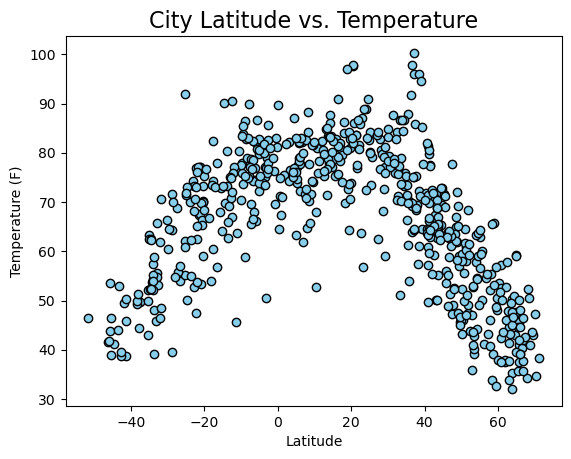

In [20]:
plt.scatter(weather_df["Latitude"],weather_df["Temperature"], edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Temperature", size="16")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Plots/lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

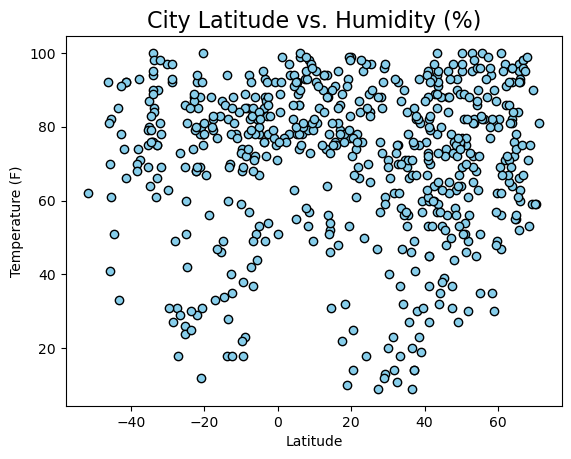

In [21]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"], cmap="BlYlRd", edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (%)", size="16")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Plots/lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

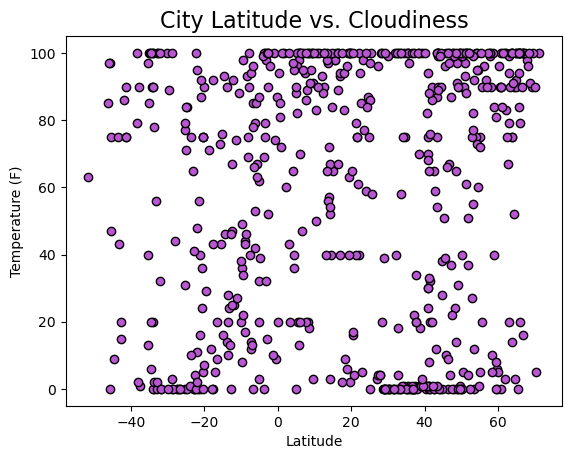

In [22]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"], cmap="BlYlRd", edgecolors="black",facecolors="mediumorchid")
plt.title("City Latitude vs. Cloudiness", size="16")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Plots/lat_vs_clouds.png")
plt.show()

## Latitude vs. Wind Speed Plot

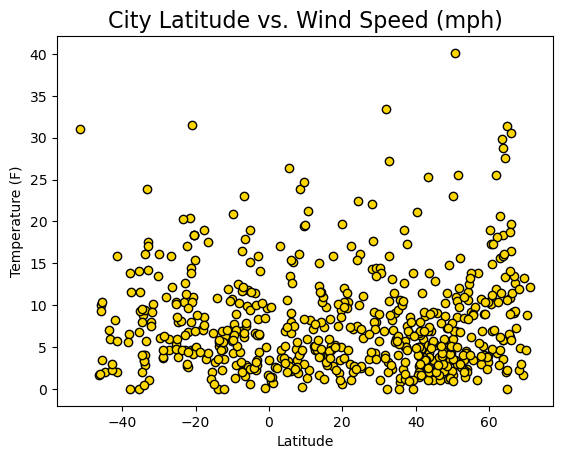

In [23]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"], cmap="BlYlRd", edgecolors="black",facecolors="gold")
plt.title("City Latitude vs. Wind Speed (mph)", size="16")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Plots/lat_vs_wind.png")
plt.show()

## Linear Regression

In [24]:
#Split into northern and souther hemisphere DataFrames
southern_df = weather_df.loc[(weather_df['Latitude']<0)]
northern_df = weather_df.loc[(weather_df['Latitude']>=0)]

In [29]:
#Set base function for all linear regression plots
def linear_regression(x_values, y_values, y_title, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    fig1, ax1 = plt.subplots(figsize=(6, 4))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    #Set and format title and axis label
    plt.title(f'{y_title} vs Latitude\n{hemisphere} Hempisphere',fontsize =14)
    plt.xlabel("Latitude",fontsize =12)
    plt.ylabel(y_title,fontsize =12)
    
    #Print r value
    print(f"The r-squared for the {hemisphere} Hemisphere is: {rvalue**2}")
    plt.savefig("Plots/{hemisphere}-{y_title}vslatitude")
    
    #Generate plot
    plt.show()

The r-squared for the Northern Hemisphere is: 0.5938750677224078


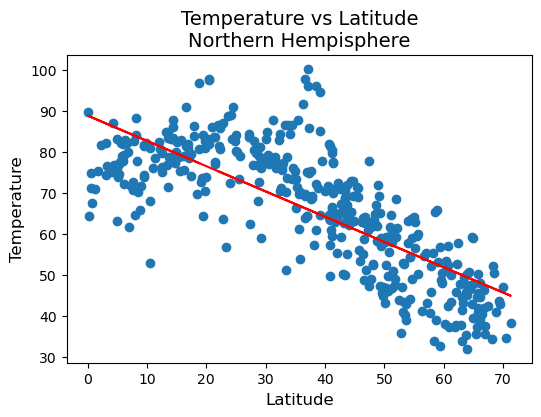

The r-squared for the Southern Hemisphere is: 0.6175525243228162


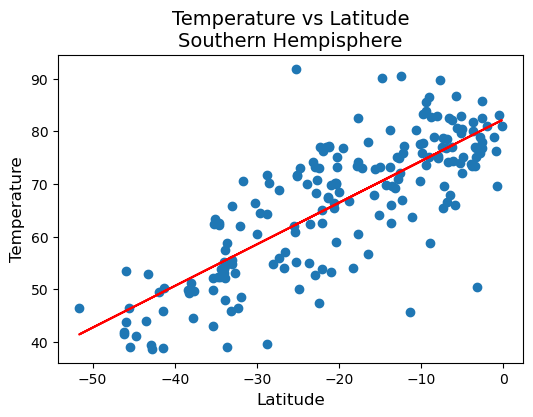

In [30]:
#linear regression plots, Northern vs Southern Hempishphere for latitude vs temperature
x_values = northern_df['Latitude']
y_values = northern_df['Temperature']
linear_regression(x_values, y_values, 'Temperature', 'Northern')

x_values = southern_df['Latitude']
y_values = southern_df['Temperature']
linear_regression(x_values, y_values, 'Temperature', 'Southern')

The r-squared for the Northern Hemisphere is: 0.0024860325278283093


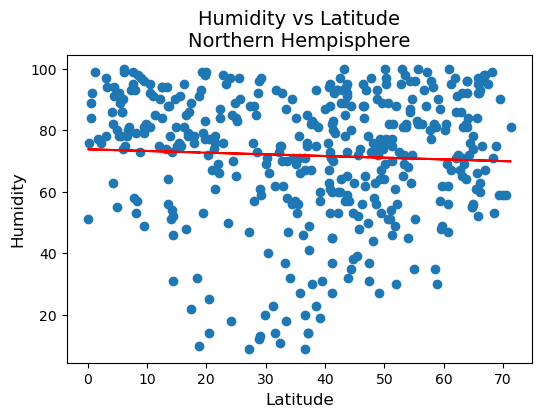

The r-squared for the Southern Hemisphere is: 0.0014768930927121513


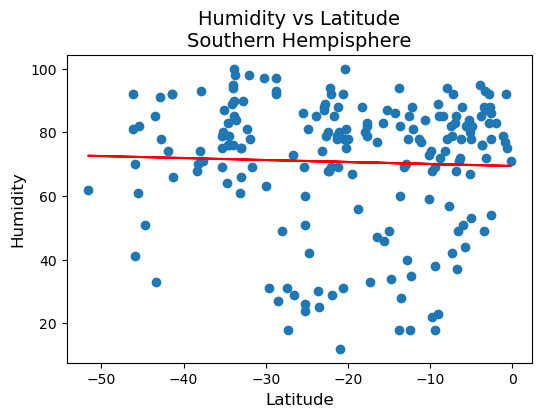

In [31]:
#linear regression plots, Northern vs Southern Hempishphere for latitude vs humidity
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
linear_regression(x_values, y_values, 'Humidity', 'Northern')

x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
linear_regression(x_values, y_values, 'Humidity', 'Southern')

The r-squared for the Northern Hemisphere is: 7.141991698481399e-07


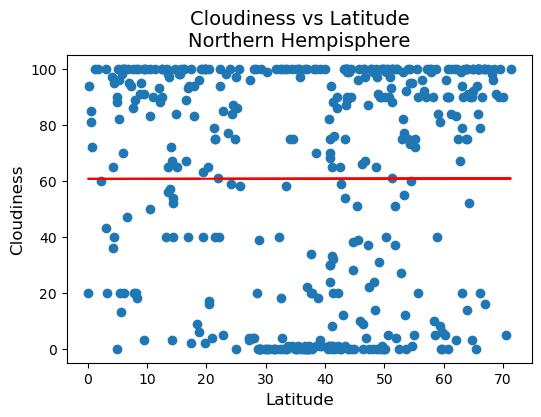

The r-squared for the Southern Hemisphere is: 0.0017375885659330328


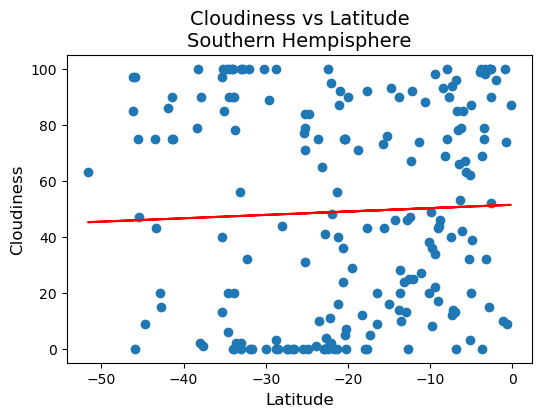

In [32]:
#linear regression plots, Northern vs Southern Hempishphere for latitude vs cloudiness
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
linear_regression(x_values, y_values, 'Cloudiness', 'Northern')

x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
linear_regression(x_values, y_values, 'Cloudiness', 'Southern')

The r-squared for the Northern Hemisphere is: 0.016047042389582964


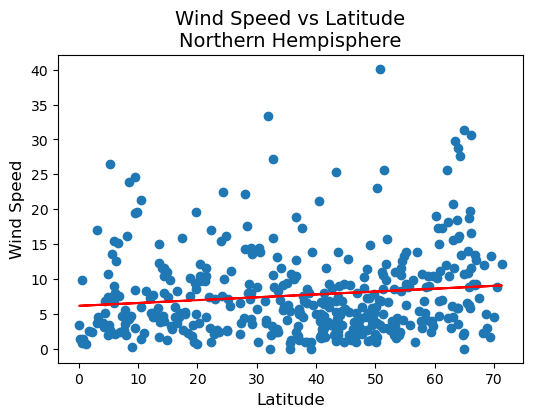

The r-squared for the Southern Hemisphere is: 0.0033770390758048182


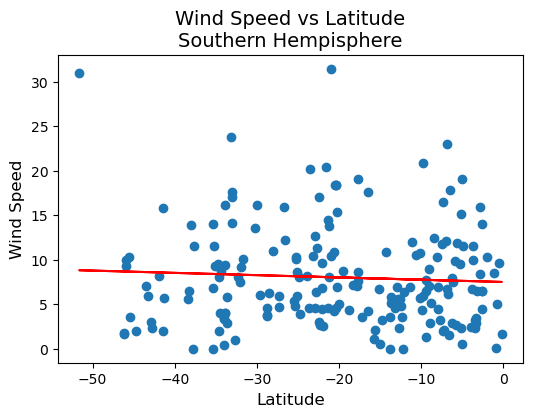

In [33]:
#linear regression plots, Northern vs Southern Hempishphere for latitude vs wind speed
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']
linear_regression(x_values, y_values, 'Wind Speed', 'Northern')

x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']
linear_regression(x_values, y_values, 'Wind Speed', 'Southern')